In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# import pyspark.pandas as ps
import seaborn as sns
from pyspark.sql import SparkSession

In [2]:
import os

In [3]:
df = pd.read_pickle('../../Files/Submissions/score/done/d_DeSantis.pickle')

In [9]:
from datetime import datetime

In [11]:
date = df['created_utc'][0]

In [12]:
date

1615842983

In [13]:
datetime.fromtimestamp(date)

datetime.datetime(2021, 3, 15, 22, 16, 23)

In [18]:
df['date'] = pd.to_datetime([datetime.fromtimestamp(f) for f in df['created_utc']]).date

In [25]:
t = df.groupby(['date', 'pred_1'], as_index=False).num_comments.count()

In [26]:
t2 = t.copy()

In [29]:
temp = t.pivot(index='date',columns='pred_1')

In [31]:
t2 = t.pivot(index='date',columns='pred_1')

In [30]:
temp.head()

num_comments         
pred_1              0.0  1.0 2.0
date                            
2021-02-03          1.0  NaN NaN
2021-02-08          6.0  1.0 NaN
2021-02-09         11.0  NaN NaN
2021-02-10          5.0  NaN NaN
2021-02-11         14.0  NaN NaN

In [32]:
df4 = temp.add(t2,  fill_value=0)

In [33]:
df4.head()

num_comments         
pred_1              0.0  1.0 2.0
date                            
2021-02-03          2.0  NaN NaN
2021-02-08         12.0  2.0 NaN
2021-02-09         22.0  NaN NaN
2021-02-10         10.0  NaN NaN
2021-02-11         28.0  NaN NaN

In [59]:
df5 = pd.read_pickle('../../Files/Submissions/score/done/d_EUnews.pickle')

In [61]:
df4.head()

num_comments         
pred_1                  0.0  1.0 2.0
author                              
12djtpiy14              8.0  NaN NaN
1977_Chevy_K10          NaN  2.0 NaN
1Dragoe                 2.0  NaN NaN
1MsConcerned            2.0  NaN NaN
ActualWish4164          2.0  NaN NaN

In [62]:
sl = df5.groupby(['author', 'pred_1'], as_index=False).num_comments.count()
df6 = sl.pivot(index='author',columns='pred_1')

In [63]:
df7 = df4.add(df6,  fill_value=0)

In [69]:
df4.index

Index(['12djtpiy14', '1977_Chevy_K10', '1Dragoe', '1MsConcerned',
       'ActualWish4164', 'AidanPlayz101', 'Aidan_2006', 'AlexParker54',
       'Alternative_Power_87', 'AltonOliver556',
       ...
       'trsvrs', 'tumadre22', 'turtisolajuwan', 'ubmt1861', 'ufdan15',
       'volv07', 'yanks28th', 'zartified', 'zebraballer', 'zippe6'],
      dtype='object', name='author', length=323)

In [65]:
df6.head()

num_comments         
pred_1                    0.0  1.0 2.0
author                                
20mitch                   3.0  NaN NaN
2A1ZA                     1.0  1.0 NaN
2ADF379FF404DEEF          1.0  NaN NaN
7Glorfindel               1.0  1.0 NaN
Adept_Ad_3403            23.0  3.0 NaN

In [67]:
df6.columns

MultiIndex([('num_comments', 0.0),
            ('num_comments', 1.0),
            ('num_comments', 2.0)],
           names=[None, 'pred_1'])

In [72]:
df6.columns = df6.columns.droplevel(1)

IndexError: Too many levels: Index has only 1 level, not 2

In [82]:
df6.reset_index(inplace=True)

In [83]:
df6.index

RangeIndex(start=0, stop=199, step=1)

In [8]:
test_dict = {
  'a' : {'1.0': 15, '2.0': 35, '3.0': 105}, 
  'b' : {'1.0': 5, '2.0': 305, '3.0': 5}
}

In [46]:
from collections import defaultdict



In [89]:
df = pd.read_csv('../../Files/Submissions/score/done/author_db.csv')

In [91]:
df.head(60)

,Unnamed: 0,num_comments,num_comments.1,num_comments.2
0,pred_1,0.0,1.0,2.0
1,author,NaN,NaN,NaN
2,------------------16,1.0,NaN,NaN
3,------------------GL,2.0,NaN,NaN
4,------------------O,2.0,3.0,NaN
5,------------------f,1.0,NaN,NaN
6,------------------fd,NaN,1.0,NaN
7,-----------------yes,NaN,1.0,NaN
8,--------------____,NaN,2.0,NaN
9,--------------m,NaN,2.0,NaN


In [48]:
from tqdm import tqdm
for i, j in tqdm(df2.iterrows(), total=len(df2)):   
    Data[j['author']][j['pred_1']] += j['num_comments']

  0%|          | 0/375 [00:00<?, ?it/s]


KeyError: 0.0

In [4]:
posts.rename(columns={'Unnamed: 0': 'subreddit'}, inplace=True)

In [29]:
comments = pd.read_csv('../../Files/Comments/EDA_stats.csv')

In [30]:
comments.rename(columns={'Unnamed: 0': 'subreddit'}, inplace=True)

In [8]:
print(len(comments), len(posts))

107 289


In [31]:
comments.head()

,subreddit,posts,authors
0,Government_is_lame,4772,1326
1,WikiLeaks,20159,4769
2,DemocraticSocialism,104328,18359
3,weddingshaming,279424,58370
4,collapse,1993238,112822


In [39]:
total = pd.merge(comments, posts, on='subreddit')

In [42]:
total.head()

,subreddit,posts_x,authors_x,posts_y,posts_pro,posts_anti,posts_neutral,authors_y
0,Cringetopia,2660748,531580,311040,164590,145063,1387,132843
1,NoNewNormal,2220944,111728,109292,91367,9240,8685,23222
2,collapse,1993238,112822,41924,31450,7189,3285,15115
3,ToiletPaperUSA,1472011,225791,40296,23935,15842,519,15542
4,Destiny,1360336,43038,68625,46468,19913,2244,15686


In [44]:
total.rename(columns={'posts_x': 'comments', 'posts_y': 'posts'}, inplace=True)

In [45]:
total["c_p_ratio"] = total["comments"] / total["posts"]

In [48]:
total.describe()

,comments,authors_x,posts,posts_pro,posts_anti,posts_neutral,authors_y,c_p_ratio
count,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.717404e+05,30239.644860,22892.401869,14423.448598,7494.757009,974.196262,7246.214953,16.441743
std,4.641058e+05,60298.423787,43958.955678,21432.255425,26292.313511,2842.301710,17405.571138,35.570022
min,5.400000e+01,18.000000,204.000000,104.000000,0.000000,0.000000,3.000000,0.013776
25%,1.012950e+04,1793.000000,3725.500000,2592.000000,515.500000,49.500000,289.500000,3.011474
50%,9.642900e+04,10803.000000,10673.000000,7264.000000,2034.000000,199.000000,2263.000000,7.555289
75%,3.267095e+05,42427.000000,28833.000000,19719.000000,5137.000000,608.000000,7853.000000,17.532089
max,2.660748e+06,531580.000000,311040.000000,164590.000000,230973.000000,24860.000000,132843.000000,247.537426


In [51]:
total[total['c_p_ratio'] == total['c_p_ratio'].min()]

,subreddit,comments,authors_x,posts,posts_pro,posts_anti,posts_neutral,authors_y,c_p_ratio
100,CityPorn,500,331,36295,13275,22821,199,12134,0.013776


In [52]:
total.sort_values(by='c_p_ratio', ascending=False, inplace=True)

In [56]:
posts["p_a_ratio"] = posts["posts"] / posts["authors"]

In [57]:
posts.sort_values(by='p_a_ratio', ascending=False, inplace=True)

<BarContainer object of 10 artists>

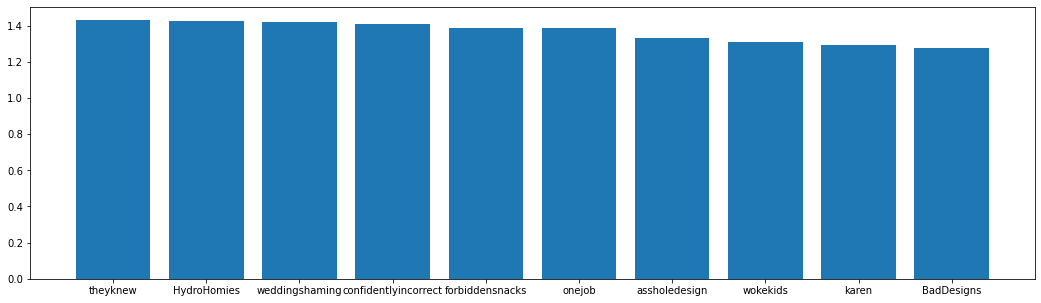

In [60]:
plt.figure(figsize =(18, 5))
plt.(posts[-11:-1].subreddit, posts[-11:-1].p_a_ratio)

In [64]:
subscribers = pd.read_csv('/Users/jakobschlierf/Desktop/Master/Thesis/Files/subs_backboned_subscribers_2.csv')

In [66]:
subscribers = subscribers[['subreddit', 'subscribers']]

In [67]:
posts_subscriptions = pd.merge(posts, subscribers, on='subreddit')

In [68]:
posts_subscriptions.head()

,subreddit,posts,posts_pro,posts_anti,posts_neutral,authors,p_a_ratio,subscribers
0,TikTokHumor,8547,5709,2805,33,2,4273.500000,23952
1,RuralNewsNetwork,30521,28391,1764,366,27,1130.407407,477
2,PositiveNewsCovid19,1651,1346,110,195,3,550.333333,2513
3,Astuff,9294,7600,1619,75,18,516.333333,449
4,PBS_NewsHour,6977,5971,756,250,18,387.611111,2263


In [69]:
posts_subscriptions['a_sub_ratio'] = posts_subscriptions['authors'] / posts_subscriptions['subscribers']

In [70]:
posts_subscriptions.sort_values(by='a_sub_ratio', ascending=False, inplace=True)

In [79]:
len(posts_subscriptions)

274

In [73]:
posts_subscriptions = posts_subscriptions[posts_subscriptions['subscribers'] > 0]

In [78]:
posts_subscriptions.head(60)

,subreddit,posts,posts_pro,posts_anti,posts_neutral,authors,p_a_ratio,subscribers,a_sub_ratio
149,196,888084,622946,262805,2333,283094,3.137064,426042,0.664474
288,VACCINES,4236,887,43,3306,3348,1.265233,6647,0.503686
273,CovidVaccinated,26721,1710,151,24860,18371,1.454521,46300,0.396782
191,Animal,10224,860,9204,160,4206,2.430813,13612,0.308992
88,VaushV,72117,52993,18255,869,14211,5.074731,53730,0.264489
117,NoNoNewNormal,827,716,79,32,208,3.975962,856,0.242991
144,JoeBiden,59338,45733,9890,3715,18529,3.202439,81480,0.227405
175,Sino,48505,29030,11773,7702,18137,2.674367,82554,0.219699
173,NoNewNormalBan,3301,2766,302,233,1221,2.703522,6789,0.179850
71,CoronavirusCirclejerk,51041,40320,7006,3715,8586,5.944677,51605,0.166379


Text(0.5, 1.0, 'Ratio of authors to subscribers')

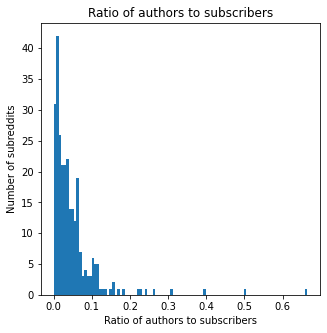

In [89]:
plt.figure(figsize =(5, 5))
plt.hist(posts_subscriptions['a_sub_ratio'], bins=100)
plt.xlabel('Ratio of authors to subscribers')
plt.ylabel('Number of subreddits')
plt.title('Ratio of authors to subscribers')


In [62]:
total["p_a_ratio"] = total["posts"] / total["authors_y"]
total["c_a_ratio"] = total["comments"] / total["authors_x"]

In [63]:
total.describe()

,comments,authors_x,posts,posts_pro,posts_anti,posts_neutral,authors_y,c_p_ratio,p_a_ratio,c_a_ratio
count,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.717404e+05,30239.644860,22892.401869,14423.448598,7494.757009,974.196262,7246.214953,16.441743,28.161692,8.640769
std,4.641058e+05,60298.423787,43958.955678,21432.255425,26292.313511,2842.301710,17405.571138,35.570022,85.736628,7.476436
min,5.400000e+01,18.000000,204.000000,104.000000,0.000000,0.000000,3.000000,0.013776,1.308935,1.510574
25%,1.012950e+04,1793.000000,3725.500000,2592.000000,515.500000,49.500000,289.500000,3.011474,2.744525,3.577126
50%,9.642900e+04,10803.000000,10673.000000,7264.000000,2034.000000,199.000000,2263.000000,7.555289,4.557757,6.322547
75%,3.267095e+05,42427.000000,28833.000000,19719.000000,5137.000000,608.000000,7853.000000,17.532089,8.597999,11.127215
max,2.660748e+06,531580.000000,311040.000000,164590.000000,230973.000000,24860.000000,132843.000000,247.537426,550.333333,46.762320


<BarContainer object of 10 artists>

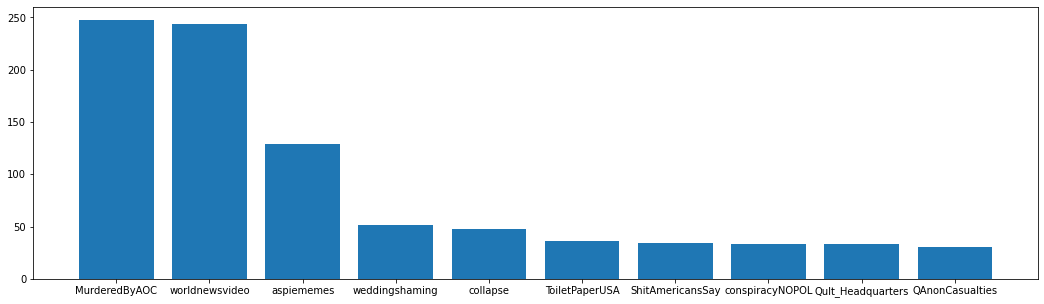

In [55]:
plt.figure(figsize =(18, 5))
plt.bar(total[0:10].subreddit, total[0:10].c_p_ratio)

In [32]:
print(comments.posts.sum(), posts.posts.sum())

29076224 26232841


In [15]:
posts.sort_values(by='posts', ascending=False, inplace=True)

In [33]:
comments.sort_values(by='posts', ascending=False, inplace=True)

In [34]:
comments.head(20)

,subreddit,posts,authors
16,Cringetopia,2660748,531580
76,NoNewNormal,2220944,111728
4,collapse,1993238,112822
98,ToiletPaperUSA,1472011,225791
89,Destiny,1360336,43038
70,JordanPeterson,1197614,90584
91,ShitAmericansSay,1048663,86816
24,Qult_Headquarters,969502,60607
15,LouderWithCrowder,937590,65213
13,libertarianmeme,888262,82686


<BarContainer object of 10 artists>

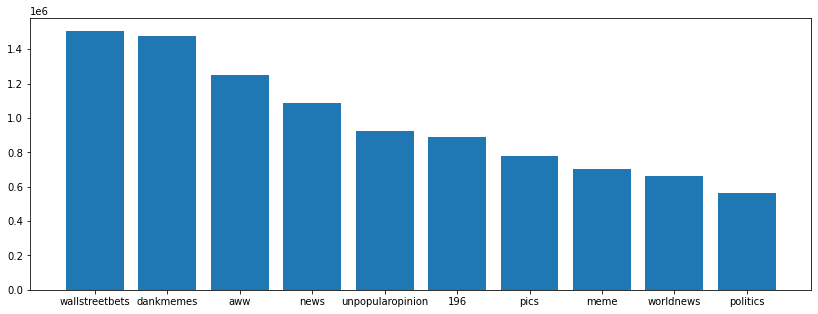

In [26]:
plt.figure(figsize =(14, 5))
plt.bar(posts[0:10].subreddit, posts[0:10].posts)

<BarContainer object of 10 artists>

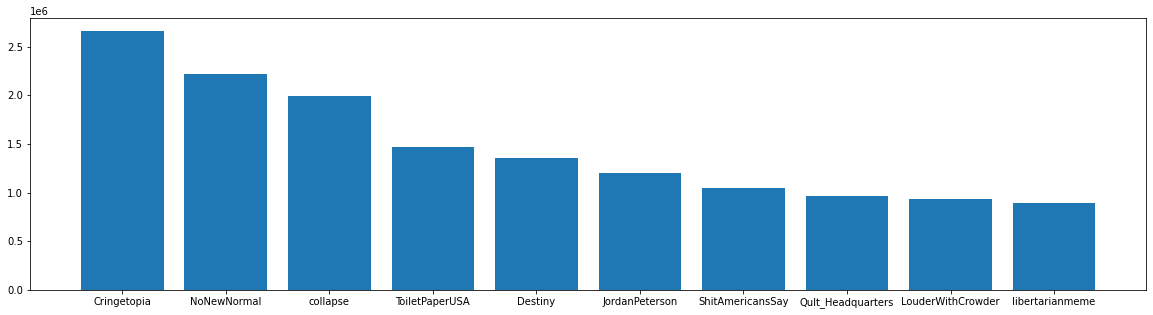

In [38]:
plt.figure(figsize =(20, 5))
plt.bar(comments[0:10].subreddit, comments[0:10].posts)

In [4]:


spark = SparkSession.builder.getOrCreate()

22/08/24 12:46:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [5]:
df = spark.read.parquet(dirs) 

In [24]:
import pyspark 
pyspark.sql.shuffle.partitions

AttributeError: module 'pyspark.sql' has no attribute 'shuffle'

In [21]:
df.select(coalesce(df["subreddits"])).show()

NameError: name 'coalesce' is not defined

In [12]:
# get length of the pyspark SQL dataframe
df.createOrReplaceTempView("table1")

In [16]:
df2 = spark.sql("SELECT COUNT(DISTINCT(subreddit)) FROM table1")


In [18]:
df2.show()

22/08/24 14:29:42 ERROR Executor: Exception in task 27.0 in stage 7.0 (TID 322)
java.lang.RuntimeException: file:/home/3147567/Thesis/Files/Submissions/score/done/Archive.tar.bz2 is not a Parquet file. expected magic number at tail [80, 65, 82, 49] but found [-19, 105, 126, 32]
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:524)
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:505)
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:499)
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:448)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.footerFileMetaData$lzycompute$1(ParquetFileFormat.scala:271)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.footerFileMetaData$1(ParquetFileFormat.scala:270)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.$anonfun$buildReaderWithPartitionValues$2(P

Py4JJavaError: An error occurred while calling o39.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 38 in stage 7.0 failed 1 times, most recent failure: Lost task 38.0 in stage 7.0 (TID 333) (dsba.sm.unibocconi.it executor driver): java.lang.RuntimeException: file:/home/3147567/Thesis/Files/Submissions/score/done/Archive.tar.bz2 is not a Parquet file. expected magic number at tail [80, 65, 82, 49] but found [-19, 105, 126, 32]
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:524)
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:505)
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:499)
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:448)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.footerFileMetaData$lzycompute$1(ParquetFileFormat.scala:271)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.footerFileMetaData$1(ParquetFileFormat.scala:270)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.$anonfun$buildReaderWithPartitionValues$2(ParquetFileFormat.scala:274)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:116)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:169)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:93)
	at org.apache.spark.sql.execution.FileSourceScanExec$$anon$1.hasNext(DataSourceScanExec.scala:503)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.columnartorow_nextBatch_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.agg_doAggregateWithKeys_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2261)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:390)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3696)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2929)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:301)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:338)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.lang.RuntimeException: file:/home/3147567/Thesis/Files/Submissions/score/done/Archive.tar.bz2 is not a Parquet file. expected magic number at tail [80, 65, 82, 49] but found [-19, 105, 126, 32]
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:524)
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:505)
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:499)
	at org.apache.parquet.hadoop.ParquetFileReader.readFooter(ParquetFileReader.java:448)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.footerFileMetaData$lzycompute$1(ParquetFileFormat.scala:271)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.footerFileMetaData$1(ParquetFileFormat.scala:270)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.$anonfun$buildReaderWithPartitionValues$2(ParquetFileFormat.scala:274)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:116)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:169)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:93)
	at org.apache.spark.sql.execution.FileSourceScanExec$$anon$1.hasNext(DataSourceScanExec.scala:503)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.columnartorow_nextBatch_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.agg_doAggregateWithKeys_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:755)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
